In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load

In [3]:
file_path = './bank-full.csv'
df_bank = pd.read_csv(file_path, sep=';')
print('Loaded bank-full.csv with shape:', df_bank.shape)
print('Columns:', list(df_bank.columns))
print('Target distribution (y):')
print(df_bank['y'].value_counts())

Loaded bank-full.csv with shape: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
Target distribution (y):
y
no     39922
yes     5289
Name: count, dtype: int64


# 2) Quick peek

In [4]:
# 2) Quick peek
print('Head:')
print(df_bank.head())

Head:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


# 3) Basic data quality

In [ ]:
print('Missing values per column:')
print(df_bank.isna().sum())

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# 4) Convert suitable columns to categorical

In [ ]:
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'poutcome', 'y'
]
for c in categorical_cols:
    if c in df_bank.columns:
        df_bank[c] = df_bank[c].astype('category')
print('Converted selected columns to category dtype')

Converted selected columns to category dtype


# 5) Summary stats for numeric columns

In [ ]:
num_cols = df_bank.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)
print('Numeric summary:')
print(df_bank[num_cols].describe())

Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Numeric summary:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000

# 6) Class balance

/tmp/ipykernel_143550/2780048031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df_bank, palette='Set2')


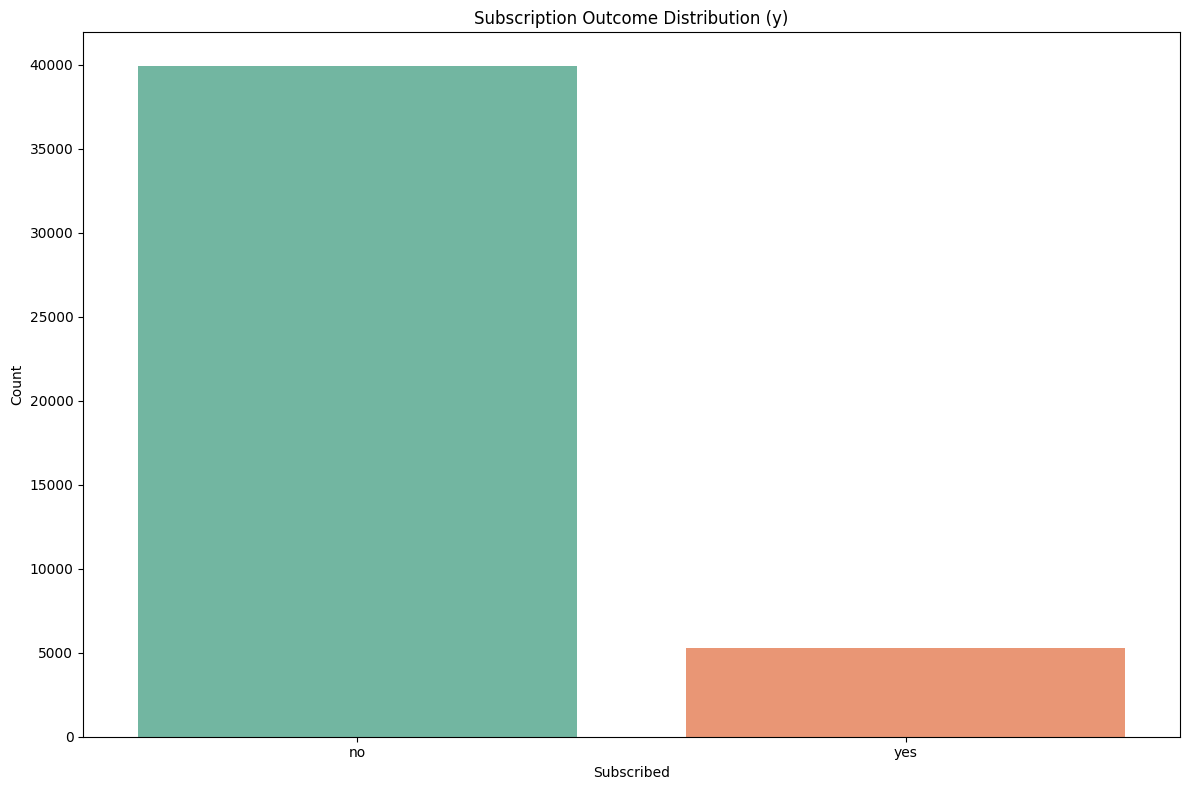

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='y', data=df_bank, palette='Set2')
plt.title('Subscription Outcome Distribution (y)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 7) Top categorical drivers (univariate)

/tmp/ipykernel_143550/1165670566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


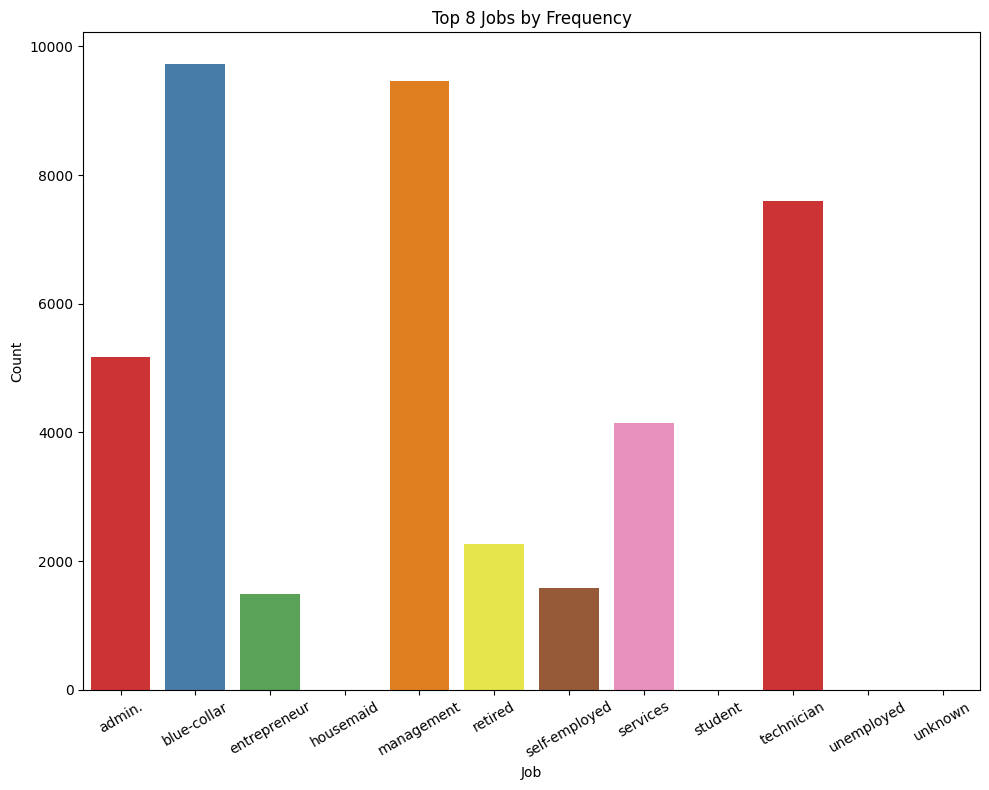

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x=df_bank['job'].value_counts().index[:8],
    y=df_bank['job'].value_counts().values[:8],
    palette='Set1'
)
plt.title('Top 8 Jobs by Frequency')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Conversion-rate helper

In [ ]:
def plot_conversion_rate(cat_col):
    cr = (
        df_bank.groupby(cat_col)['y']
        .apply(lambda s: (s == 'yes').mean())
        .sort_values(ascending=False)
        .head(10)
    )
    plt.figure(figsize=(10, 8))
    sns.barplot(x=cr.index, y=cr.values)
    plt.title(f'Conversion Rate by {cat_col}')
    plt.ylabel('Rate')
    plt.xlabel(cat_col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_143550/1676744811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bank.groupby(cat_col)['y']


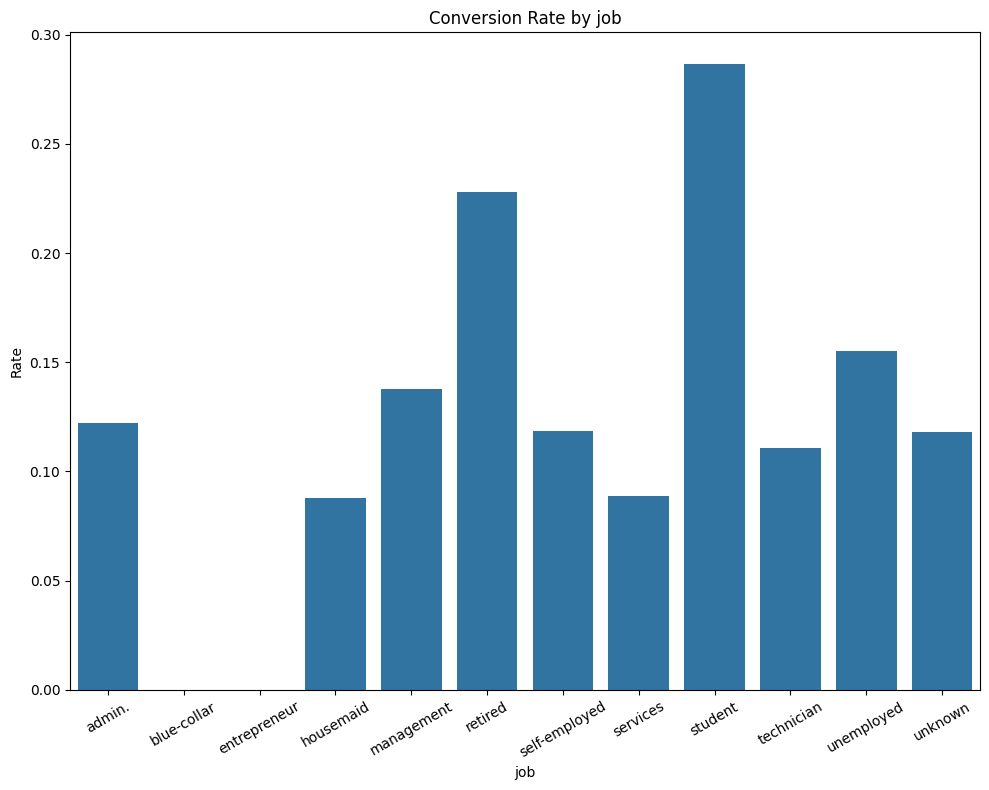

/tmp/ipykernel_143550/1676744811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bank.groupby(cat_col)['y']


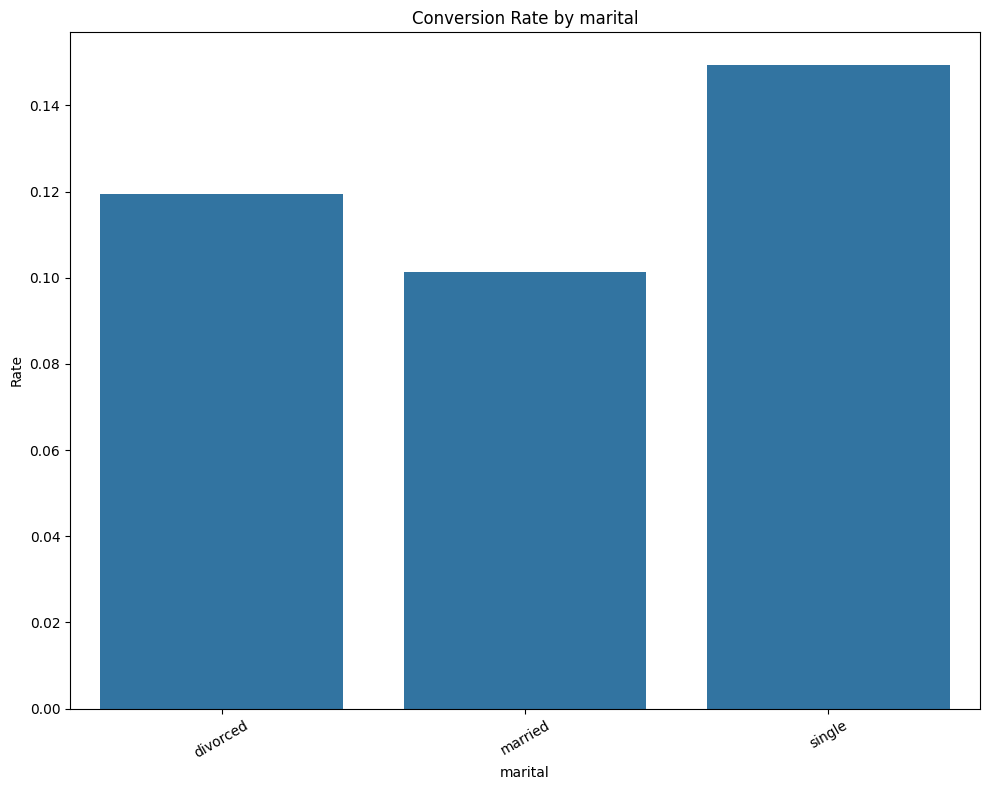

/tmp/ipykernel_143550/1676744811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bank.groupby(cat_col)['y']


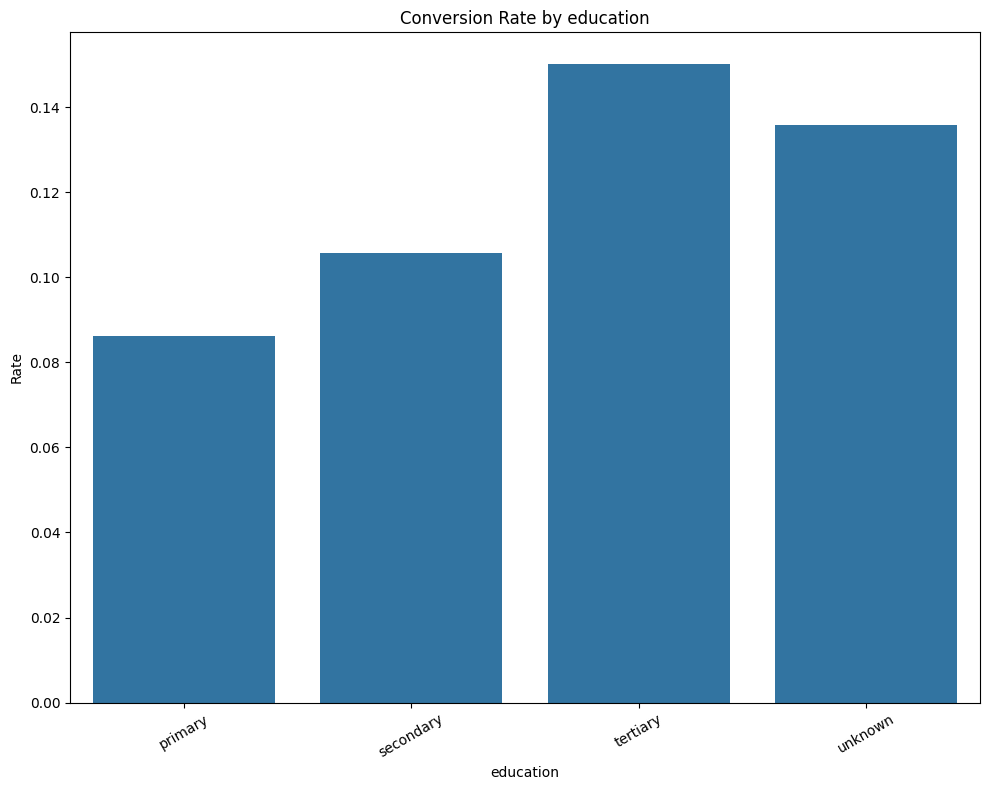

/tmp/ipykernel_143550/1676744811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bank.groupby(cat_col)['y']


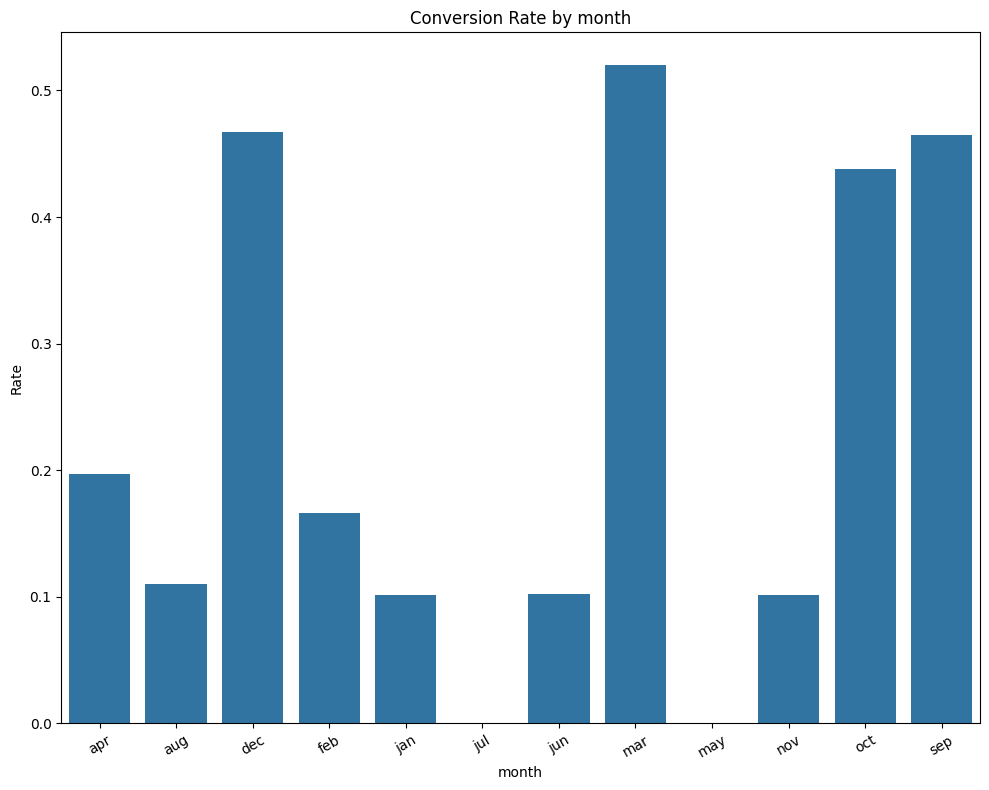

/tmp/ipykernel_143550/1676744811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bank.groupby(cat_col)['y']


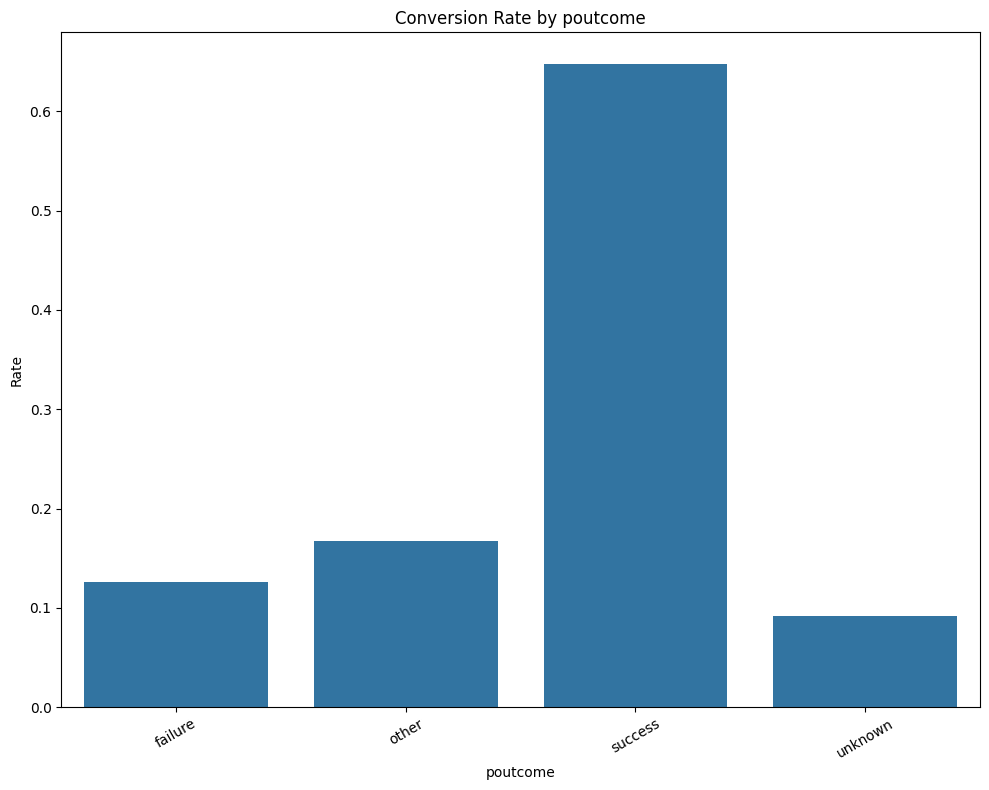

In [25]:
plot_conversion_rate('job')
plot_conversion_rate('marital')
plot_conversion_rate('education')
plot_conversion_rate('month')
plot_conversion_rate('poutcome')

# 8) Numeric vs target

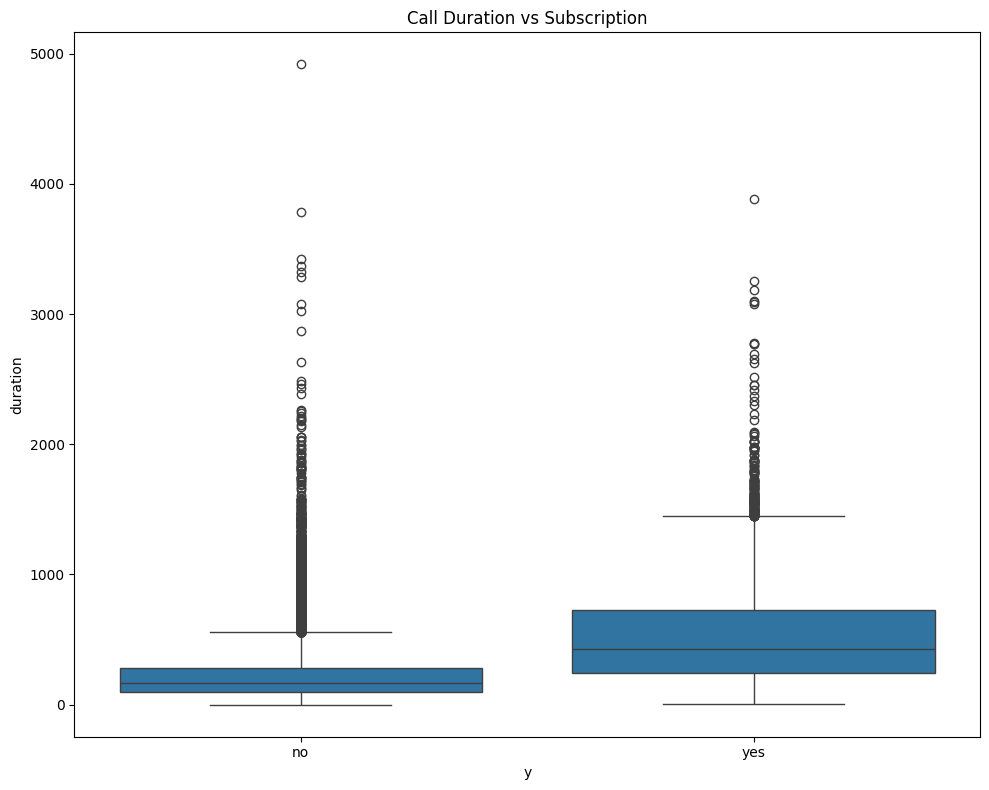

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='y', y='duration', data=df_bank)
plt.title('Call Duration vs Subscription')
plt.tight_layout()
plt.show()

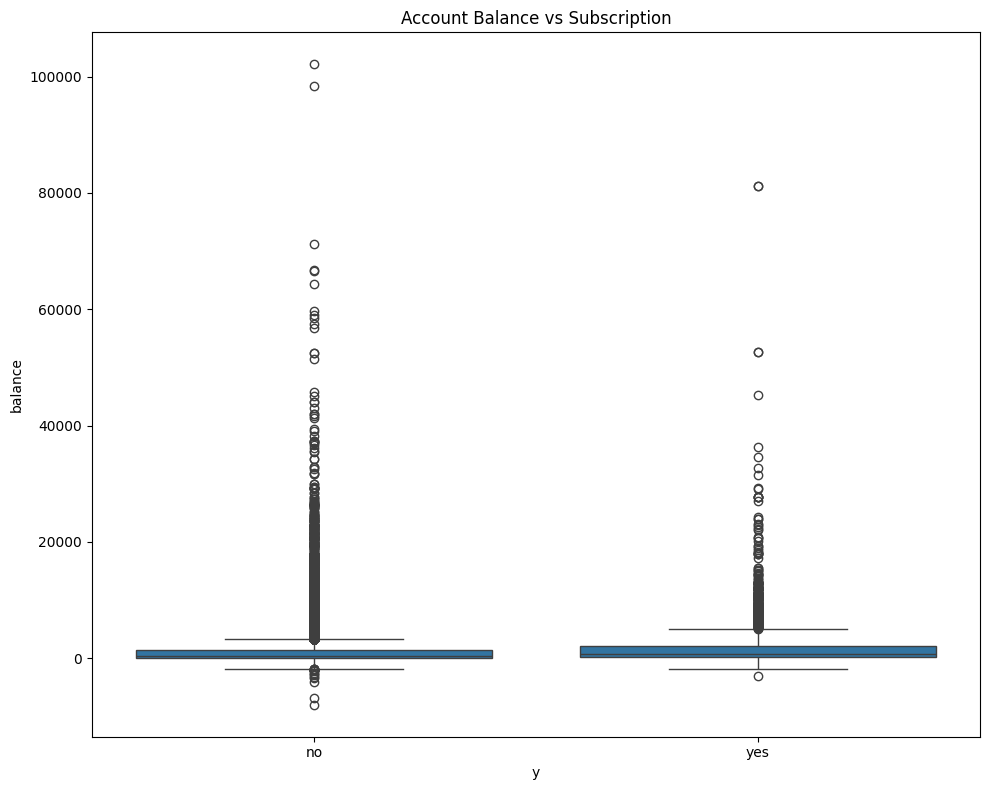

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='y', y='balance', data=df_bank)
plt.title('Account Balance vs Subscription')
plt.tight_layout()
plt.show()

# 9) Correlation heatmap

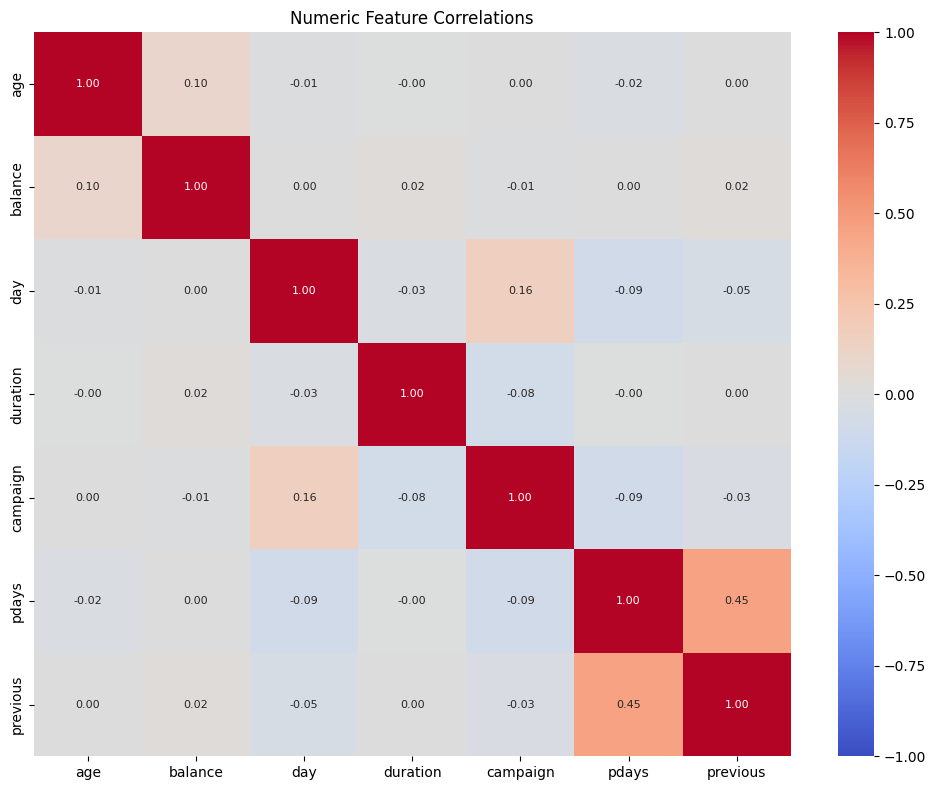

In [26]:
corr = df_bank[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,            # <-- show correlation numbers
    fmt='.2f',             # <-- two decimals
    annot_kws={'size': 8}, # <-- adjust font size if needed
    vmin=-1,
    vmax=1
)
plt.title('Numeric Feature Correlations')
plt.tight_layout()
plt.show()

# 10) Baseline logistic-regression pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

In [16]:
X = df_bank.drop(columns=['y'])
y = (df_bank['y'] == 'yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

clf = Pipeline(steps=[
    ('prep', preprocess),
    ('logit', LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)
print('Trained baseline logistic regression')

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]
print('Classification report (test):')
print(classification_report(y_test, y_pred, digits=3))
print('ROC AUC (test):', roc_auc_score(y_test, y_proba))

Trained baseline logistic regression
Classification report (test):
              precision    recall  f1-score   support

           0      0.918     0.974     0.945      9981
           1      0.638     0.343     0.446      1322

    accuracy                          0.900     11303
   macro avg      0.778     0.659     0.696     11303
weighted avg      0.885     0.900     0.887     11303

ROC AUC (test): 0.9007777409453149


/home/ayyan/jupyter_venv/jupyter_venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


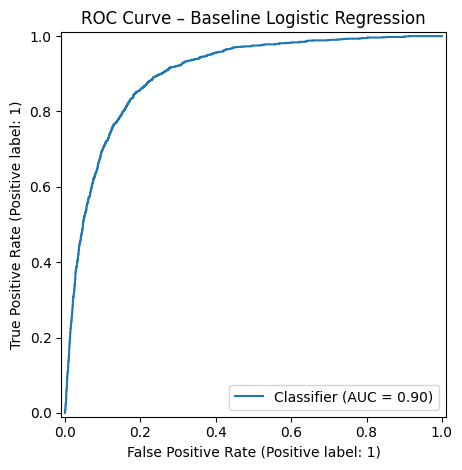

In [17]:
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('ROC Curve – Baseline Logistic Regression')
plt.tight_layout()
plt.show()

# 11) Feature importance from coefficients

In [ ]:
ohe = clf.named_steps['prep'].named_transformers_['cat']
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([cat_names, numeric_features])
coefs = clf.named_steps['logit'].coef_.flatten()
coef_df = (
    pd.DataFrame({'feature': feature_names, 'coef': coefs})
    .sort_values('coef', ascending=False)
)
print('Top positive coefficients:')
print(coef_df.head(10))
print('Top negative coefficients:')
print(coef_df.tail(10))

Top positive coefficients:
             feature      coef
42  poutcome_success  1.656302
35         month_mar  0.675159
38         month_oct  0.599562
5        job_retired  0.498362
39         month_sep  0.442611
25  contact_cellular  0.327041
8        job_student  0.281823
28         month_apr  0.228236
30         month_dec  0.217930
34         month_jun  0.163014
Top negative coefficients:
             feature      coef
13   marital_married -0.476812
19        default_no -0.477812
22       housing_yes -0.555276
29         month_aug -0.632972
37         month_nov -0.670263
33         month_jul -0.697197
24          loan_yes -0.735946
40  poutcome_failure -0.841693
27   contact_unknown -1.077475
43  poutcome_unknown -1.136209


/tmp/ipykernel_143550/2586436552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=coef_df.head(10),palette="viridis")


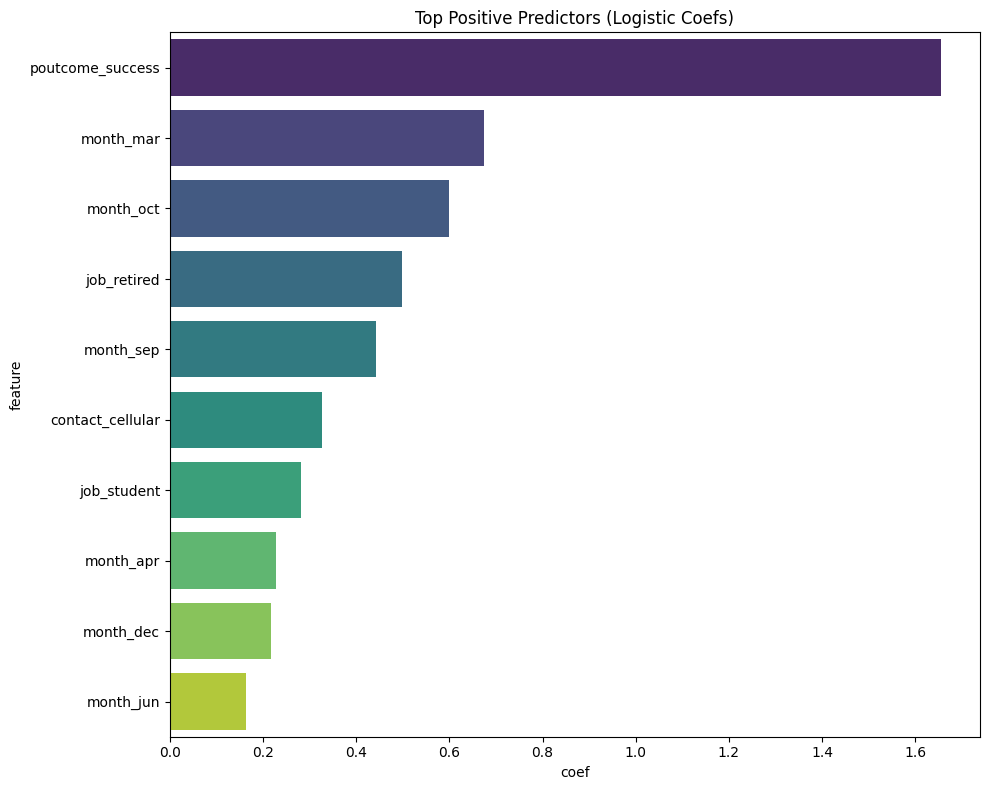

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(x='coef', y='feature', data=coef_df.head(10),palette="viridis")
plt.title('Top Positive Predictors (Logistic Coefs)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_143550/2312128702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=coef_df.tail(10), palette="Reds_r" )


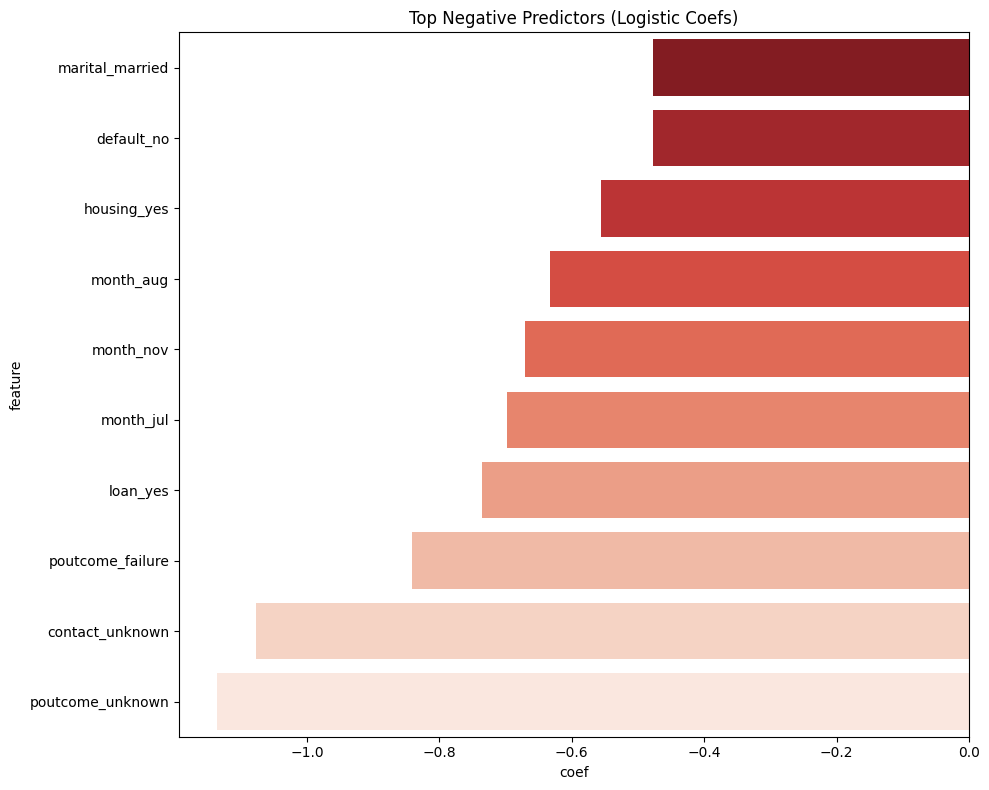

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(x='coef', y='feature', data=coef_df.tail(10), palette="Reds_r" )
plt.title('Top Negative Predictors (Logistic Coefs)')
plt.tight_layout()
plt.show()